# Tarefa 01

- Leia os enunciados com atenção
- Saiba que pode haver mais de uma resposta correta
- Insira novas células de código sempre que achar necessário
- Em caso de dúvidas, procure os monitores
- Divirta-se :)

#### 1. Baixando dados de ativos
    1. Baixe os dados de três ativos da sua escolha do Yahoo Finance, correspondente a um período de pelo menos 2 anos até a data mais recente.
    2. Salve esses dados para que você possa utilizá-los na próxima tarefa.

In [551]:
import pandas as pd
from datetime import datetime


from pandas_datareader import data as pdr
import yfinance as yf
import plotly.express as px

In [569]:
%%time
ativos = ['NVDA', 'MSFT', 'MGLU3.SA']
inicio = '2023-01-01'
fim = '2024-01-01'

dados_hist = yf.download(ativos, start=inicio, end=fim)

dados_hist.head()

[*********************100%***********************]  3 of 3 completed

CPU times: user 32.3 ms, sys: 6.96 ms, total: 39.3 ms
Wall time: 47.2 ms


Price           Close                              High              \
Ticker       MGLU3.SA        MSFT       NVDA   MGLU3.SA        MSFT   
Date                                                                  
2023-01-02  24.224874         NaN        NaN  24.879601         NaN   
2023-01-03  23.757212  235.711685  14.304594  25.814924  241.782061   
2023-01-04  23.850744  225.400925  14.738280  24.411940  229.110043   
2023-01-05  24.879601  218.720551  14.254632  25.347261  223.875950   
2023-01-06  25.814924  221.298233  14.848199  25.908457  222.114834   

Price                        Low                              Open  \
Ticker           NVDA   MGLU3.SA        MSFT       NVDA   MGLU3.SA   
Date                                                                 
2023-01-02        NaN  23.850744         NaN        NaN  24.786068   
2023-01-03  14.985100  23.383083  233.566876  14.085753  24.318405   
2023-01-04  14.842205  23.383083  222.311624  14.230650  24.224874   
2023-01-05  14.553414  23.476616  218.179428  14.137716  24.131342   
2023-01-06  14.999089  24.318405  215.808342  14.023799  24.973133   

Price                                  Volume                           
Ticker            MSFT       NVDA    MGLU3.SA        MSFT         NVDA  
Date                                                                    
2023-01-02         NaN        NaN   7497888.0         NaN          NaN  
2023-01-03  239.155173  14.840205  17551556.0  25740000.0  401277000.0  
2023-01-04  228.529573  14.556413  15827820.0  50623400.0  431324000.0  
2023-01-05  223.531595  14.480468  18612739.0  39585600.0  389168000.0  
2023-01-06  219.399402  14.463479  15385492.0  43613600.0  405044000.0

In [571]:
dados_hist.to_csv('dados_historicos_acoes.csv')

#### 2. Observando a volatilidade dentro do dia
1. Calcule a amplitude de variação do valor do ativo dentro do dia. Essa amplitude você pode calcular com um comando simples de adicionar uma coluna no Pandas: (valor máximo - valor mínimo).
2. Monte um gráfico de linha mostrando a variação dessa amplitude ao longo do período coletado, por ativo.
3. Veja se consegue identificar que ativo apresentou maior volatilidade.

In [574]:
dados = dados_hist.stack().reset_index().copy()
dados

/var/folders/dc/lt16pv3d6151yyg_m796mdn80000gn/T/ipykernel_45200/3078290551.py:1: FutureWarning:

The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.



Price,Date,Ticker,Close,High,Low,Open,Volume
0,2023-01-02,MGLU3.SA,24.224874,24.879601,23.850744,24.786068,7497888.0
1,2023-01-03,MGLU3.SA,23.757212,25.814924,23.383083,24.318405,17551556.0
2,2023-01-03,MSFT,235.711685,241.782061,233.566876,239.155173,25740000.0
3,2023-01-03,NVDA,14.304594,14.985100,14.085753,14.840205,401277000.0
4,2023-01-04,MGLU3.SA,23.850744,24.411940,23.383083,24.224874,15827820.0
...,...,...,...,...,...,...,...
743,2023-12-28,MGLU3.SA,20.202984,20.857710,20.109451,20.670645,12859371.0
744,2023-12-28,MSFT,372.494507,373.665741,371.382825,372.583835,14327000.0
745,2023-12-28,NVDA,49.507965,49.869862,49.397996,49.628933,246587000.0
746,2023-12-29,MSFT,373.248871,374.360553,370.707875,373.209159,18723000.0


In [576]:
df = df.stack()
df

/var/folders/dc/lt16pv3d6151yyg_m796mdn80000gn/T/ipykernel_45200/2863846091.py:1: FutureWarning:

The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.



Price                     Close        High         Low        Open  \
Date       Ticker                                                     
2019-01-02 ABEV3.SA   12.564919   12.681621   11.981409   11.981409   
           MGLU3.SA   53.938564   53.938564   51.920109   52.323220   
           NVDA        3.378090    3.434135    3.225082    3.239713   
2019-01-03 ABEV3.SA   12.704963   12.704963   12.362637   12.455999   
           MGLU3.SA   53.361446   53.793561   52.015812   53.648556   
...                         ...         ...         ...         ...   
2019-12-27 NVDA        5.897028    5.983416    5.870639    5.969972   
2019-12-30 ABEV3.SA   14.907016   15.449960   14.907016   15.330194   
           MGLU3.SA  111.131195  114.136631  110.688530  113.693966   
           NVDA        5.783752    5.880347    5.752384    5.875119   
2019-12-31 NVDA        5.857942    5.867402    5.729232    5.748401   

Price                     Volume     Range  
Date       Ticker                           
2019-01-02 ABEV3.SA   18692900.0  0.700212  
           MGLU3.SA    2888583.0  2.018455  
           NVDA      508752000.0  0.209054  
2019-01-03 ABEV3.SA   22739200.0  0.342326  
           MGLU3.SA    2816395.0  1.777748  
...                          ...       ...  
2019-12-27 NVDA      254644000.0  0.112777  
2019-12-30 ABEV3.SA   17430500.0  0.542945  
           MGLU3.SA    3458739.0  3.448100  
           NVDA      258056000.0  0.127964  
2019-12-31 NVDA      231004000.0  0.138171  

[748 rows x 6 columns]

In [578]:
dados['valor'] = dados['High']-dados['Low']
dados

Price,Date,Ticker,Close,High,Low,Open,Volume,valor
0,2023-01-02,MGLU3.SA,24.224874,24.879601,23.850744,24.786068,7497888.0,1.028856
1,2023-01-03,MGLU3.SA,23.757212,25.814924,23.383083,24.318405,17551556.0,2.431841
2,2023-01-03,MSFT,235.711685,241.782061,233.566876,239.155173,25740000.0,8.215185
3,2023-01-03,NVDA,14.304594,14.985100,14.085753,14.840205,401277000.0,0.899346
4,2023-01-04,MGLU3.SA,23.850744,24.411940,23.383083,24.224874,15827820.0,1.028856
...,...,...,...,...,...,...,...,...
743,2023-12-28,MGLU3.SA,20.202984,20.857710,20.109451,20.670645,12859371.0,0.748259
744,2023-12-28,MSFT,372.494507,373.665741,371.382825,372.583835,14327000.0,2.282916
745,2023-12-28,NVDA,49.507965,49.869862,49.397996,49.628933,246587000.0,0.471866
746,2023-12-29,MSFT,373.248871,374.360553,370.707875,373.209159,18723000.0,3.652678


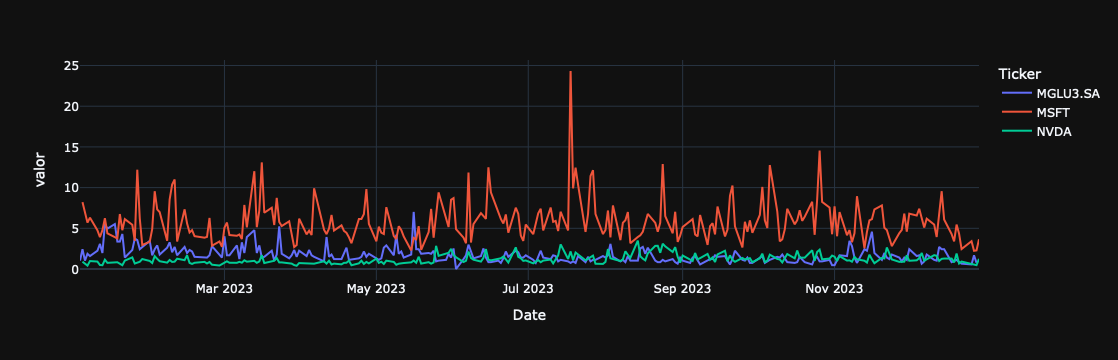

In [580]:
fig = px.line(dados, x='Date', y='valor', color='Ticker', template='plotly_dark') 
fig.show()

In [584]:
mais_volatil = dados.sort_values(by=['valor'],ascending=False).iloc[0]
mais_volatil

Price
Date      2023-07-18 00:00:00
Ticker                   MSFT
Close              355.346558
High               362.552543
Low                338.226209
Open               341.843997
Volume             64872700.0
valor               24.326334
Name: 404, dtype: object